<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/08_Clasificacion_de_imagenes_CIFAR_10_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de imágenes (CIFAR-10 data-set)**
En este Jupyter Notebook mostraremos cómo clasificar un dat-set de 60,000 imágenes para su correcta clasificación. Nos encontramos ante un claro ejemplo de clasificación, para lo cual haremos uso de una red profunda convolucional que terminará en una capa de salida densa fully-connected del tamaño del número de etiquetas del que consta nuestro data-set.

##Importar Líbrerias

In [ ]:
import os
#import time

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')


##Cargar conjunto de datos
1. El data-set que vamos a usar ocupa aproximadamente 170 MB y se descargará automáticamente desde los tutoriales de ejemplo de Keras.
2. En el CIFAR-10 data-set contamos con imágenes de 10 clases distintas: aviones, coches, pájaros, perros, gatos, cérvidos, ranas, equinos, barcos y camiones.

- [tensorflow datasets](https://www.tensorflow.org/datasets/catalog/cifar10?hl=es-419)

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
num_train, img_rows, img_cols,  img_channels =  train_images.shape
num_train , img_rows, img_cols,  img_channels

(50000, 32, 32, 3)

In [ ]:
num_test, _, _, _ =  test_images.shape
num_test, img_channels, img_rows, img_cols

(10000, 3, 32, 32)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

##Mostrar imagenes del conjunto de datos



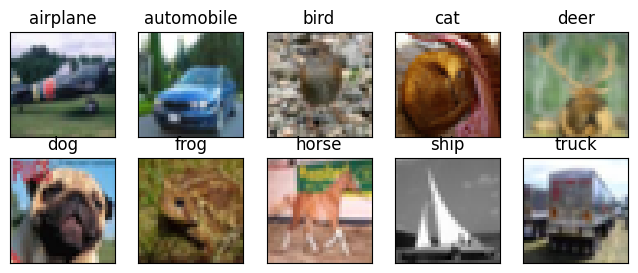

In [ ]:
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels == i)[0]
    features_idx = train_images[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Normalizamos el train y el test data-set entre 0 y 1
train_features = train_images.astype('float32') / 255.
test_features = test_images.astype('float32') / 255.

# Convertimos las etiquetas a variables One-Hot Encoded

num_classes = len(np.unique(train_labels))

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

##Creación del modelo convolucional

In [ ]:
train_features.shape[1:]

(32, 32, 3)

In [ ]:
# Definición del modelo
# Iniciamos el modelo de manera secuencial
model = Sequential()
# Continuamos añadiendo al modelo las capas sin preocuparnos de la dimensionalidad de los inputs
# salvo en la primera capa
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=train_features.shape[1:]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))
# Hacemos un flattening de la última capa de Pooling
model.add(Flatten())

model.add(Dense(units=512, activation = 'relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_features, train_labels, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 158ms/step - accuracy: 0.6290 - loss: 1.0431
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 153ms/step - accuracy: 0.6917 - loss: 0.8703
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 153ms/step - accuracy: 0.7285 - loss: 0.7662
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 153ms/step - accuracy: 0.7574 - loss: 0.6915
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 157ms/step - accuracy: 0.7787 - loss: 0.6252


##Guardar el modelo entrenado

In [ ]:
model.save('cifar10_model.keras')

In [ ]:
from keras.models import load_model
loaded_model = load_model('cifar10_model.keras')

In [ ]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,752,576 (14.31 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,501,718 (9.54 MB)

In [ ]:
loaded_model.evaluate(test_features, test_labels)
predictions = loaded_model.predict(test_features)
#predict_classes = loaded_model.predict_classes(test_features)

predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7613 - loss: 0.6799
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step


array([[5.6695886e-04, 5.1733651e-03, 5.9399419e-03, ..., 1.9263122e-03,
        7.4487287e-03, 6.1846193e-04],
       [3.5947275e-03, 3.8610199e-01, 3.1432359e-07, ..., 7.6983468e-09,
        6.1005324e-01, 2.4854043e-04],
       [2.0710558e-01, 1.5387499e-02, 5.3393519e-03, ..., 1.3818155e-03,
        7.3431253e-01, 6.8748472e-03],
       ...,
       [1.8609488e-07, 5.1474082e-08, 7.5205165e-04, ..., 6.8672784e-03,
        9.9046417e-07, 4.7796470e-07],
       [3.8697187e-02, 8.5950333e-01, 2.4262439e-03, ..., 1.4157434e-03,
        3.9290273e-04, 1.7558312e-03],
       [4.9073540e-12, 2.1309521e-13, 2.6166305e-09, ..., 9.9949735e-01,
        5.3883758e-13, 2.9143623e-12]], dtype=float32)

In [ ]:
y_test = np.argmax(test_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)



In [ ]:
print(predictions[0])
clase = np.argmax(predictions[0])
clase

##Metricas

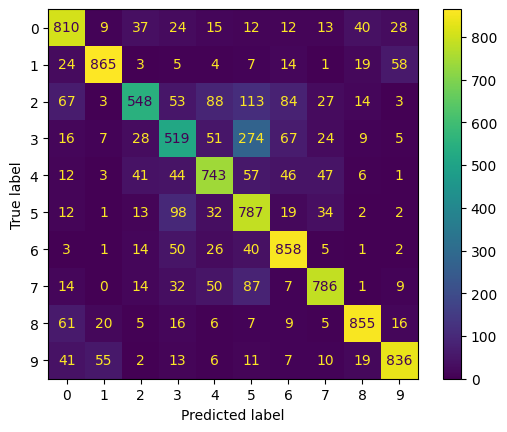

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Asume que 'y_true' son las etiquetas verdaderas y 'y_pred' son las etiquetas predichas
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Reemplaza con tus etiquetas de clase
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Asume que 'y_true' son las etiquetas verdaderas y 'y_pred' son las etiquetas predichas
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.90      0.86      0.88      1000
           2       0.78      0.55      0.64      1000
           3       0.61      0.52      0.56      1000
           4       0.73      0.74      0.74      1000
           5       0.56      0.79      0.66      1000
           6       0.76      0.86      0.81      1000
           7       0.83      0.79      0.81      1000
           8       0.89      0.85      0.87      1000
           9       0.87      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



##Predicción

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def predecir(path, label):
  #Cargar imagen
  image = cv2.imread(path)

  #Redimensionar 32*32
  imagen_redimensionada = cv2.resize(image, (32, 32))

  #Mostrar imagen
  cv2_imshow(imagen_redimensionada)

  #Predecir la clase
  clase = np.argmax(loaded_model.predict(np.array([imagen_redimensionada])))
  predicted_label = class_names[clase]

  print(f"Etiqueta original: {label}")
  print(f"Etiqueta predicha: {predicted_label}")


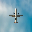

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Etiqueta original: airplane
Etiqueta predicha: airplane


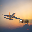

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: airplane
Etiqueta predicha: airplane


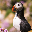

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Etiqueta original: bird
Etiqueta predicha: horse


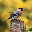

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: bird
Etiqueta predicha: airplane


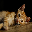

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: cat
Etiqueta predicha: horse


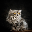

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Etiqueta original: cat
Etiqueta predicha: horse


In [ ]:
rutas = [["/content/airplane_1.webp","airplane"],
         ["/content/airplane_2.jpg","airplane"],
         ["/content/bird_1.jpg","bird"],
         ["/content/bird_2.jpg","bird"],
         ["/content/cat_1.jpg","cat"],
         ["/content/cat_2.jpg","cat"]
]

for x in rutas:
  predecir(x[0], x[1])

Tarea

- Crear una red convolucional con el dataset MNIST
- Guardar el modelo con .save
- Hacer Prdicciones con imagenes
- Realizar metricas de evaluación

**1. Configurar e importar las librerías necesarias**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**2. Cargar el conjunto de datos MNIST desde TensorFlow**

In [2]:
# Cargar los datos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**3. Preprocesar los datos**

In [3]:
# Normalizar las imágenes
train_images, test_images = train_images / 255.0, test_images / 255.0

# Cambiar la forma de las imágenes para que tengan una dimensión de canal (necesario para la red convolucional)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

**4. Crear la red convolucional**

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Resumen de la arquitectura del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

**5. Compilar el modelo**

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**6. Entrenar el modelo**

In [6]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.8924 - loss: 0.3343 - val_accuracy: 0.9844 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9876 - val_loss: 0.0389
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9920 - val_loss: 0.0277
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9924 - val_loss: 0.0246


**7. Guardar el modelo**

In [7]:
model.save("mnist_cnn_model.h5")

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

8. Hacer predicciones con imágenes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


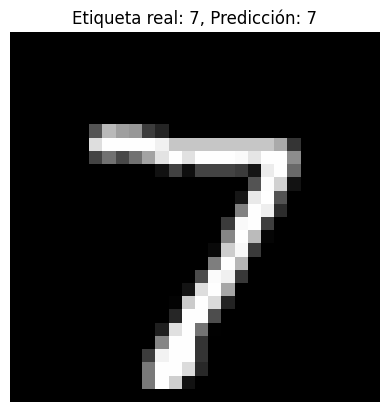

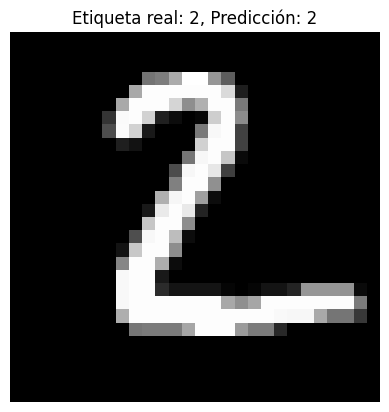

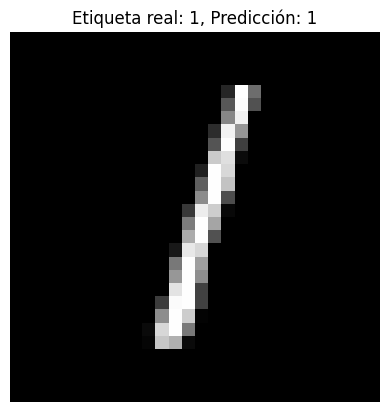

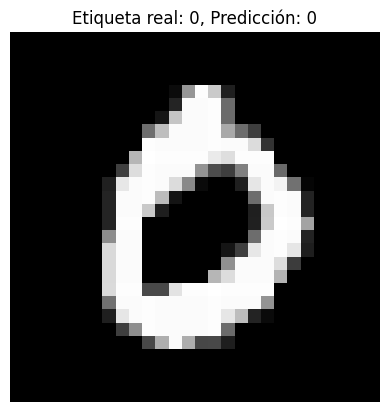

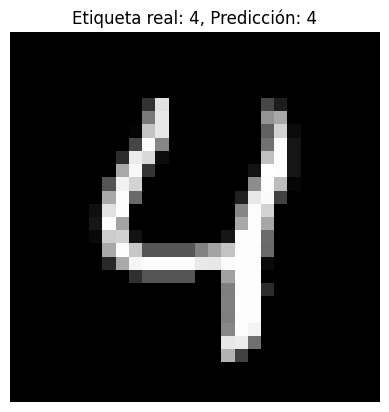

In [8]:
# Tomar algunas imágenes de prueba
sample_images = test_images[:5]
sample_labels = test_labels[:5]

# Realizar predicciones
predictions = model.predict(sample_images)

# Mostrar predicciones junto a las imágenes reales
for i in range(5):
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Etiqueta real: {sample_labels[i]}, Predicción: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

9. Evaluar el modelo

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9894 - loss: 0.0325
Precisión en el conjunto de prueba: 0.9923999905586243


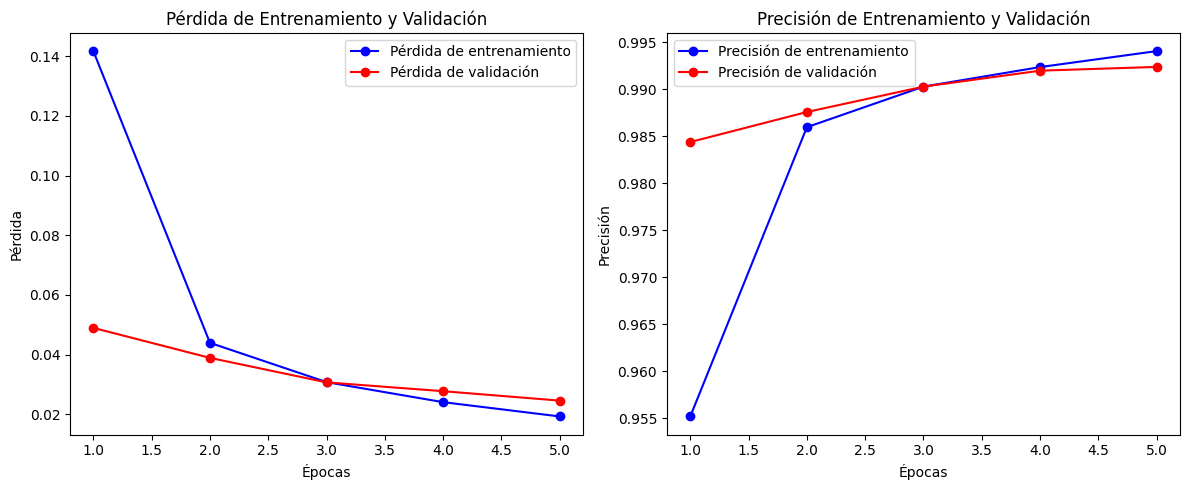

In [10]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión de entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Graficar la pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'ro-', label='Precisión de validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

Crear una red convolucional con el dataset de tensorflow
Análisis exploratorio de los datps
Guardar el modelo con .save
Hacer Predicciones con imagenes
Realizar metricas de evaluación


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Cargar el dataset Fashion MNIST desde TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Ver la forma de los datos
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Forma de y_test: (10000,)


Análisis Exploratorio de los Datos

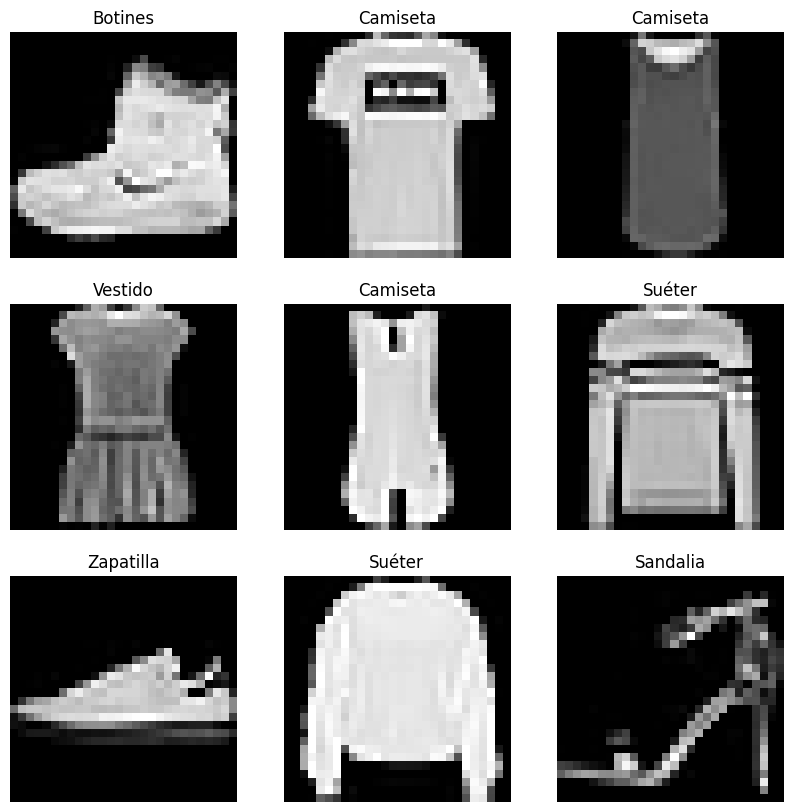

In [14]:
# Mostrar algunas imágenes de ejemplo con sus etiquetas
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botines']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

CANTIDAD TOTAL DE IMAGENES

In [40]:
num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
print(f"Número total de imágenes de entrenamiento: {num_train_images}")
print(f"Número total de imágenes de prueba: {num_test_images}")

Número total de imágenes de entrenamiento: 60000
Número total de imágenes de prueba: 10000


DIMENSION DE LAS IMAGANES

In [41]:
image_height, image_width = x_train.shape[1:3]
print(f"Dimensiones de las imágenes: {image_height}x{image_width}")

Dimensiones de las imágenes: 28x28


Preparar los datos para el modelo

In [15]:
# Normalizar los valores de píxeles a un rango de 0 a 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Cambiar la forma de los datos para que sean compatibles con la red convolucional
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

Distribución de las clases

In [42]:


# Contar la cantidad de imágenes por clase
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribución de clases en el conjunto de entrenamiento:")
for class_label, count in class_distribution.items():
    print(f"Clase {class_label}: {count} imágenes")

Distribución de clases en el conjunto de entrenamiento:
Clase 0: 6000 imágenes
Clase 1: 6000 imágenes
Clase 2: 6000 imágenes
Clase 3: 6000 imágenes
Clase 4: 6000 imágenes
Clase 5: 6000 imágenes
Clase 6: 6000 imágenes
Clase 7: 6000 imágenes
Clase 8: 6000 imágenes
Clase 9: 6000 imágenes


Crear el modelo de red neuronal convolucional (CNN)

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases de Fashion MNIST
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar y entrenar el modelo

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.7267 - loss: 0.7436 - val_accuracy: 0.8523 - val_loss: 0.3998
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.8715 - loss: 0.3558 - val_accuracy: 0.8832 - val_loss: 0.3173
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 39ms/step - accuracy: 0.8933 - loss: 0.2884 - val_accuracy: 0.8885 - val_loss: 0.2964
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9069 - loss: 0.2549 - val_accuracy: 0.8993 - val_loss: 0.2707
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9164 - loss: 0.2269 - val_accuracy: 0.9023 - val_loss: 0.2654


Compilar y entrenar el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Guardar el modelo entrenador

In [18]:
model.save('fashion_mnist_cnn_model.h5')

PREDICCIONES

In [34]:
# Definir las rutas de las imágenes a clasificar
image_paths = [
    '/content/images (1).jfif',
    '/content/falda.jpg',
    '/content/pantalon.jfif',
    '/content/images.jfif'
]

In [32]:
# Función para cargar y preparar una imagen
def load_and_prepare_image(img_path):
    # Cargar la imagen desde la ruta y redimensionarla
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

    # Convertir la imagen en un array numpy y normalizarla
    img_array = image.img_to_array(img) / 255.0

    # Expandir las dimensiones para que tenga la forma (1, 28, 28, 1), como el modelo espera
    img_array = np.expand_dims(img_array, axis=0)

    return img_array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicción para /content/images (1).jfif: Suéter (Confianza: 0.53)


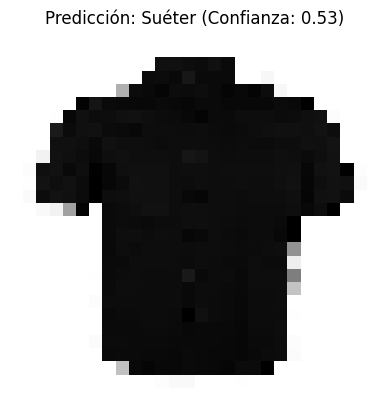

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicción para /content/falda.jpg: Camisa (Confianza: 0.65)


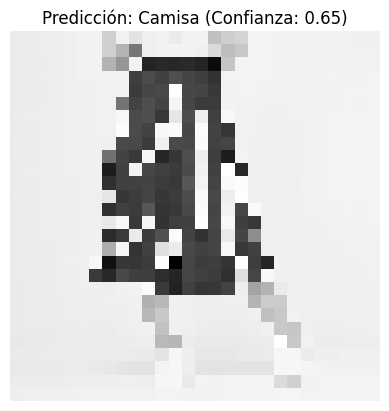

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción para /content/pantalon.jfif: Vestido (Confianza: 0.97)


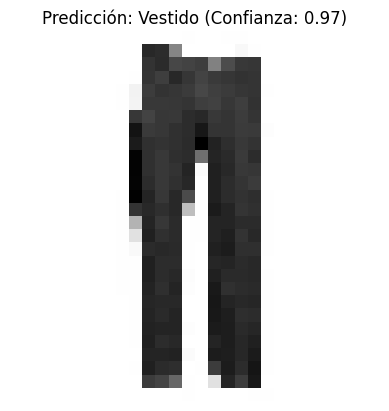

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción para /content/images.jfif: Bolso (Confianza: 0.83)


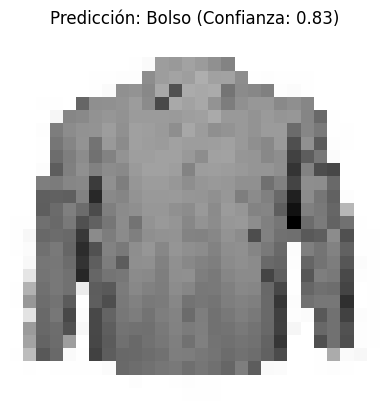

In [38]:
# Clasificar cada imagen y mostrar resultados
for img_path in image_paths:
    # Preparar la imagen
    input_image = load_and_prepare_image(img_path)

    # Realizar la predicción
    prediction = model.predict(input_image)

    # Obtener la clase con la mayor probabilidad
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Definir los nombres de las clases (ajusta según tu modelo)
    class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
                   'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botines']

    # Mostrar el resultado
    print(f"Predicción para {img_path}: {class_names[predicted_class]} (Confianza: {confidence:.2f})")

    # Mostrar la imagen
    plt.imshow(image.load_img(img_path, target_size=(28, 28), color_mode='grayscale'), cmap='gray')
    plt.title(f"Predicción: {class_names[predicted_class]} (Confianza: {confidence:.2f})")
    plt.axis('off')
    plt.show()
